In [1]:
import argparse
import EDKagomeLattice
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
L = 2
J1 = 1
J2 = 0.1
J3 = 0.06


In [3]:
def genArgs():

    parser = argparse.ArgumentParser()
    
    parser.add_argument('-f', type = str)

    parser.add_argument('--L', type = int, default = L, help = 'Lattice side size')

    # COUPLINGS
    parser.add_argument('--J1', type = float, default = J1,
                        help = 'NN coupling') # nearest-neighbour coupling
    parser.add_argument('--J2', type = float, default = J2,
                        help = '2nd NN coupling') # 2nd NN coupling
    parser.add_argument('--J3', type = float, default = J3,
                        help = '3rd NN coupling') # 3rd NN coupling
    parser.add_argument('--J4', type = float, default = 0.0,
                        help = '4th NN coupling')
    parser.add_argument('--h', type = float, default = 0.0,
                        help = 'Magnetic field')
    
    
    args = parser.parse_args()
    return args

In [4]:
def callED():
    args = genArgs()
    return EDKagomeLattice.main(args)

Lattice side size:  2


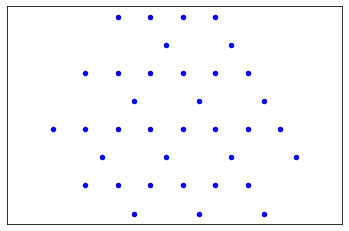

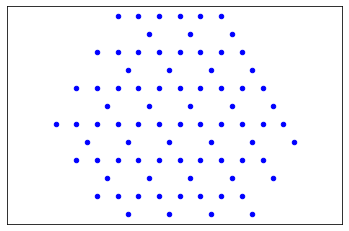

Couplings extracted:  {'J1': 1, 'J2': 0.1, 'J3': 0.06, 'J3st': 0.06, 'J4': 0.0}
dw.Hamiltonian done
hamiltonian computed


NameError: name 'minstate' is not defined

In [5]:
s_ijl, hamiltonian, minstate, minenergy= callED()

In [ ]:
minenergy/(9*L**2) + 2/3 * J1 + 2/3 *J2 - J3

In [ ]:
minenergy/(9*L**2) + 2/3 * J1 + 1/3 *J3

In [ ]:
minenergy/(9*L**2) + 2/3 * J1 - 2/3 *J2 + J3